## Imports

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smapi
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

import warnings # only added this at the end to remove warning for regplot
warnings.filterwarnings("ignore")

## 1. Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant.

### (a) Download the Combined Cycle Power Plant data from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [276]:
df = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx") #Defaults to sheet 1

In [277]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b)  Exploring the data:  
i. How many rows are in this data set? How many columns? What do the rows and columns represent?    
ii. Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.  
iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.  

In [278]:
# i.
df.shape

(9568, 5)

There are 9568 rows and 5 columns in this data set. Based on the readme file, the rows represent 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. The columns represent hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE)  of the plant.

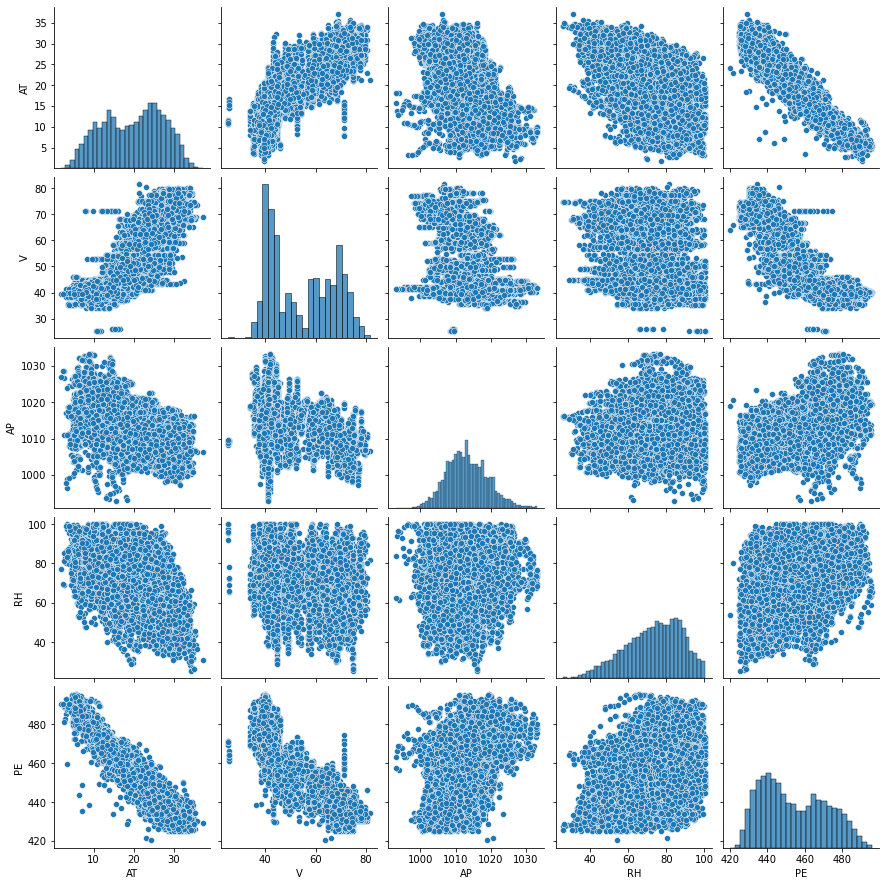

In [279]:
#ii.
sns.pairplot(df)

For the dependent variable (PE), the strength of the linear relationship between the indepndent variables and PE seems to decrease from left to right. Therefore, we should expect a simple linear regression with AT to yield the highest R<sup>2</sup> and a simple linear regression with RH to yield the lowest R<sup>2</sup>.

In [280]:
#iii. 
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [281]:
mean = df.mean()
median = df.median()
df_range = df.max() - df.min()
f_quartile = df.quantile(.25)
t_quartile = df.quantile(.75)
iqr = t_quartile - f_quartile

In [282]:
data = {'Data':['Mean','Median','Range','First Quartile','Third Quartile','Interquartile Range'],
        'AT':[mean[0],median[0],df_range[0],f_quartile[0],t_quartile[0],iqr[0]], 
        'V':[mean[1],median[1],df_range[1],f_quartile[1],t_quartile[1],iqr[1]],
        'AP':[mean[2],median[2],df_range[2],f_quartile[2],t_quartile[2],iqr[2]],
        'RH':[mean[3],median[3],df_range[3],f_quartile[3],t_quartile[3],iqr[3]],
        'PE':[mean[4],median[4],df_range[4],f_quartile[4],t_quartile[4],iqr[4]]}
table = pd.DataFrame(data)
table

,Data,AT,V,AP,RH,PE
0,Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
1,Median,20.345000,52.080000,1012.940000,74.975000,451.550000
2,Range,35.300000,56.200000,40.410000,74.600000,75.500000
3,First Quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
4,Third Quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
5,Interquartile Range,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

In [283]:
def simpleLinearRegression(ind):
    x = df[ind]
    y = df['PE']
    
    lm = sm.OLS.from_formula("y ~ x", df)
    res = lm.fit()
    print(res.summary())
    
    sns.regplot(x, y, df)
    plt.title('Simple Linear Regression')
    plt.show()
    
    # using Cook's distance to determine outliers 
    influence = res.get_influence()
    cooks = influence.cooks_distance
    print("Outliers (> 4/9568):")
    print(cooks)
    
    # plotting outliers (4/n) (n= 9568)
    plt.scatter(df[ind], cooks[0])
    plt.title('Outliers')
    plt.xlabel(ind)
    plt.ylabel('Cook\'s Distance')
    plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:46   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

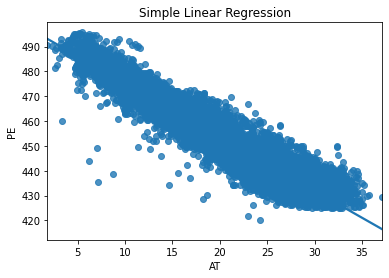

Outliers (> 4/9568):
(array([4.13347765e-06, 1.11200058e-05, 5.87010422e-05, ...,
       1.79887023e-06, 1.67067447e-04, 1.87798952e-05]), array([0.99999587, 0.99998888, 0.9999413 , ..., 0.9999982 , 0.99983295,
       0.99998122]))


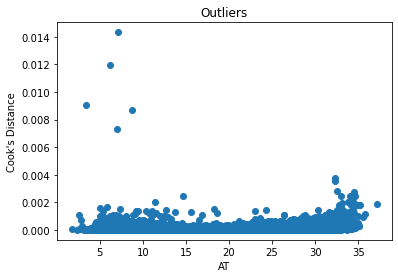

In [284]:
simpleLinearRegression('AT')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:47   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

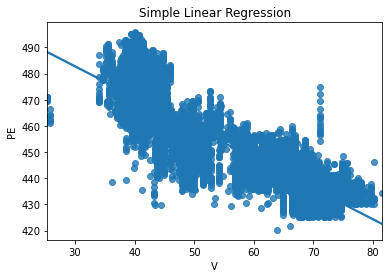

Outliers (> 4/9568):
(array([4.82936612e-05, 1.40844987e-08, 4.93307696e-04, ...,
       5.06261468e-06, 1.55816957e-06, 7.56782953e-05]), array([0.99995171, 0.99999999, 0.99950681, ..., 0.99999494, 0.99999844,
       0.99992432]))


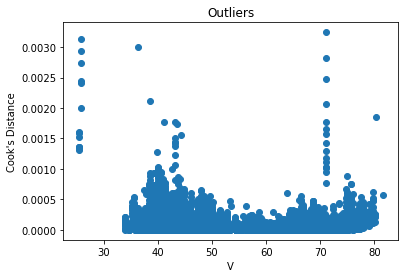

In [285]:
simpleLinearRegression('V')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:48   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

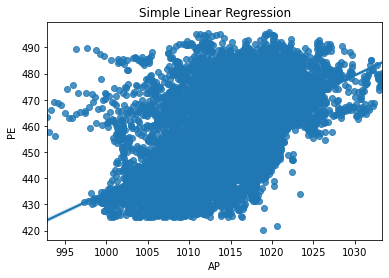

Outliers (> 4/9568):
(array([5.50963936e-05, 2.28397467e-04, 3.25843557e-04, ...,
       1.45240597e-04, 9.44547690e-05, 1.74066371e-05]), array([0.99994491, 0.99977163, 0.99967421, ..., 0.99985477, 0.99990555,
       0.99998259]))


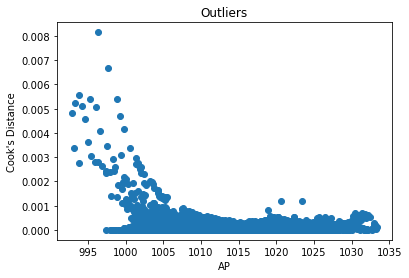

In [286]:
simpleLinearRegression('AP')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:49   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

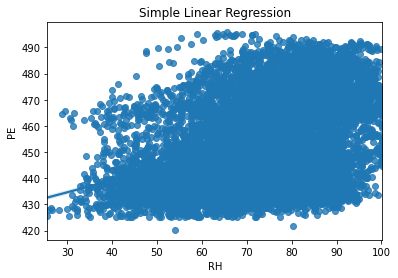

Outliers (> 4/9568):
(array([1.69802993e-05, 5.08805986e-06, 3.69882419e-04, ...,
       1.00186078e-04, 6.14752240e-05, 4.67707902e-07]), array([0.99998302, 0.99999491, 0.99963019, ..., 0.99989982, 0.99993853,
       0.99999953]))


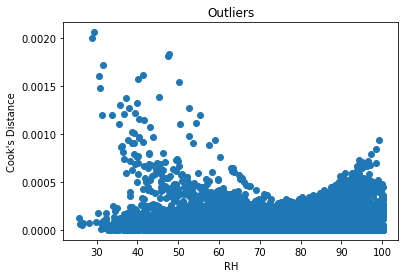

In [287]:
simpleLinearRegression('RH')

In each of these simple linear regressions, there is a statistically significant relationship between the predictor and response (as we see in the p-values). The outliers would be all of the points with Cook's distance greater than 4/9568 (~0.0004).

### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0:βj= 0?

In [288]:
mrm = sm.OLS.from_formula('PE ~ ' + '+'.join(df.columns.difference(['PE'])), df)
result = mrm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:50   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

In our results, we see that the p-value is 0.000 to three decimal places for all predictors, which suggests that we can reject the null hypothesis for all predictors.

### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

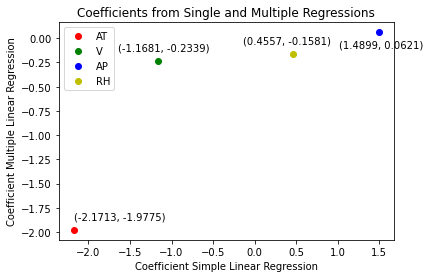

In [289]:
# points
plt.plot(-2.1713, -1.9775, 'ro', label='AT')
plt.annotate("(-2.1713, -1.9775)", xy=(-2.1713, -1.9775), xytext=(0, 10), textcoords='offset points')
plt.plot(-1.1681, -0.2339, 'go', label='V')
plt.annotate("(-1.1681, -0.2339)", xy=(-1.1681, -0.2339), xytext=(-40, 10), textcoords='offset points')
plt.plot(1.4899, 0.0621, 'bo', label='AP')
plt.annotate("(1.4899, 0.0621)", xy=(1.4898, 0.0621), xytext=(-40, -15), textcoords='offset points')
plt.plot(0.4557, -0.1581, 'yo', label='RH')
plt.annotate("(0.4557, -0.1581)", xy=(0.4556, -0.1581), xytext=(-50, 10), textcoords='offset points')


plt.title('Coefficients from Single and Multiple Regressions')
plt.xlabel('Coefficient Simple Linear Regression')
plt.ylabel('Coefficient Multiple Linear Regression')
plt.legend()
plt.show()

### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, ﬁt a model of the form  

Y = β 0 + β 1 X + β 2 X^2 + β 3 X^3 + ϵ

In [290]:
def nonLinearAssociation(ind):
    x_array = df[ind].values # column to array
    x_column = x_array.reshape(-1, 1) # array reshaped to column (n by 1)
    y_array = df['PE'].values
    y_column = y_array.reshape(-1, 1)
    
    lr = LinearRegression()
    X_fit = np.arange(df[ind].min(), df[ind].max(), 1).reshape(-1, 1) # reshaping
    multimodel = PolynomialFeatures(degree = 3) # the polyomial we are looking at is of degree 3
    multimodels = multimodel.fit_transform(x_column)
    lr.fit(multimodels, y_column) # fitting regression model
    y_pred = lr.predict(multimodel.fit_transform(X_fit))
    
    x_assoc = np.column_stack((x_column, x_column**2, x_column**3)) # β 0 + β 1 X + β 2 X^2 + β 3 X^3
    x_assoc = sm.add_constant(x_assoc) # ϵ
    association = sm.OLS(y_column, x_assoc).fit()
    print(association.summary())
    
    plt.plot(x_column, y_column, 'y.')
    plt.title('Nonlinear Association')
    plt.xlabel(ind)
    plt.ylabel('PE')
    plt.plot(X_fit, y_pred, label=ind)
    plt.legend()
    plt.show()
    

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:50   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

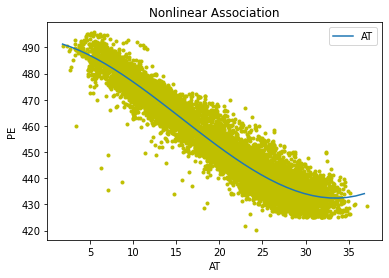

In [291]:
nonLinearAssociation('AT')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:50   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

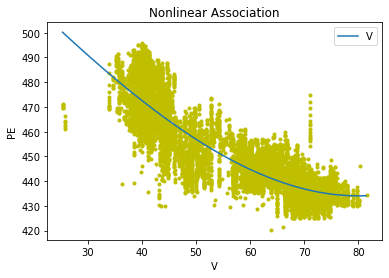

In [292]:
nonLinearAssociation('V')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:51   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

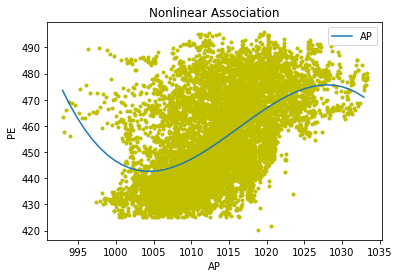

In [293]:
nonLinearAssociation('AP')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:51   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

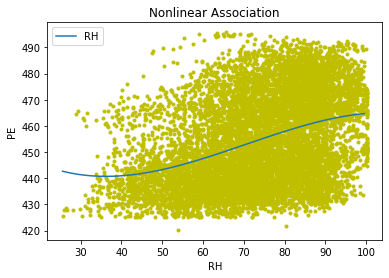

In [294]:
nonLinearAssociation('RH')

β<sub>2</sub>X<sup>2</sup> and β<sub>3</sub>X<sup>3</sup> for 'V' are the only nonlinear associations with 'PE' that are not statistically significant.

### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [295]:
df_test = df[['AT','V','AP','RH','PE']]
df_test["AT*V"] = df_test['AT'] * df_test['V']
df_test["AT*AP"] = df_test['AT'] * df_test['AP']
df_test["AT*RH"] = df_test['AT'] * df_test['RH']
df_test["V*AP"] = df_test['V'] * df_test['AP']
df_test["V*RH"] = df_test['V'] * df_test['RH']
df_test["AP*RH"] = df_test['AP'] * df_test['RH']

# multiple regression
mrm = sm.OLS.from_formula('PE ~ ' + '+'.join(df_test.columns.difference(['PE'])), df)
result = mrm.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:51   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

At α = 0.05, the AP\*RH, AT\*RH, AT\*V, and V\*AP interactions are statistically significant

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [296]:
# using initial predictors ('AT', 'V', 'AP', 'RH')

y = df['PE']
x = df.drop('PE', axis=1)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.30, random_state = 0) #random_state for reproducibility

x_train_1 = sm.add_constant(x_train_1)
result = sm.OLS(y_train_1, x_train_1).fit()
print(result.summary())

print() # For spacing

y_train_pred_1 = result.predict(x_train_1)
mse_train_1 = metrics.mean_squared_error(y_train_1, y_train_pred_1)
print('MSE of initial predictors model using training data:', mse_train_1)

x_test_1 = sm.add_constant(x_test_1)
y_test_pred_1 = result.predict(x_test_1)
mse_test_1 = metrics.mean_squared_error(y_test_1, y_test_pred_1)
print('MSE of initial predictors model using test data:', mse_test_1)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:51   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        448.5613     11.745     38.192      0.0

In [297]:
# using all predictors including initial predictors ('AT', 'V', 'AP', 'RH'), interaction terms, and quadratic nonlinearities

# we already added the interaction terms, now we need the squared terms

df_test["AT^2"] = df_test['AT'] * df_test['AT']
df_test["V^2"] = df_test['V'] * df_test['V']
df_test["AP^2"] = df_test['AP'] * df_test['AP']
df_test["RH^2"] = df_test['RH'] * df_test['RH']


y = df_test['PE']
x = df_test.drop('PE', axis=1)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.30, random_state = 0) #random_state for reproducibility

x_train_2 = sm.add_constant(x_train_2)
result = sm.OLS(y_train_2, x_train_2).fit()
print(result.summary())

print() # For spacing

y_train_pred_2 = result.predict(x_train_2)
mse_train_2 = metrics.mean_squared_error(y_train_2, y_train_pred_2)
print('MSE of all predictors model using training data:', mse_train_2)

x_test_2 = sm.add_constant(x_test_2)
y_test_pred_2 = result.predict(x_test_2)
mse_test_2 = metrics.mean_squared_error(y_test_2, y_test_pred_2)
print('MSE of all predictors model using test data:', mse_test_2)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:51   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7073.1567   1505.522     -4.698      0.0

Based on the p-values, we should remove AT\*AP, V\*AP, V\*RH, and V<sup>2</sup>. We keep V and AT even though they have p-values above our alpha (0.05) because some of their interactions and nonlinearities are statistically significant. This is known as the hierarchical principle.

In [298]:
# using only statistically significant predictors

y = df_test['PE']
x = df_test.drop(['PE', 'AT*AP', 'V*AP', 'V*RH', 'V^2'], axis=1)

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x, y, test_size=0.30, random_state = 0) #random_state for reproducibility

x_train_3 = sm.add_constant(x_train_3)
result = sm.OLS(y_train_3, x_train_3).fit()
print(result.summary())

print() #For spacing

y_train_pred_3 = result.predict(x_train_3)
mse_train_3 = metrics.mean_squared_error(y_train_3, y_train_pred_3)
print('MSE of statistically significant predictors model using training data:', mse_train_3)

x_test_3 = sm.add_constant(x_test_3)
y_test_pred_3 = result.predict(x_test_3)
mse_test_3 = metrics.mean_squared_error(y_test_3, y_test_pred_3)
print('MSE of statistically significant predictors model using test data:', mse_test_3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9892.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:55:51   Log-Likelihood:                -19255.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6686   BIC:                         3.861e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.001e+04   1121.577     -8.921      0.0

### (i) KNN Regression: i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the best ﬁt. Plot the train and test errors in terms of 1/k.

K* = 5
Test MSE = 15.6635051689307


Text(0, 0.5, 'MSE (%)')

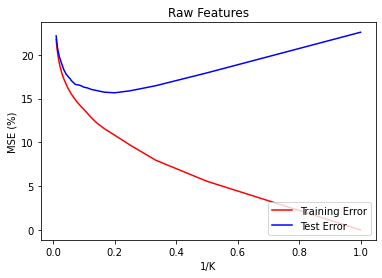

In [299]:
# Raw features

# We already have the split from part H, but we will redefine for clarity

y = df['PE']
x = df.drop('PE', axis=1)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.30, random_state = 0) #random_state for reproducibility

# empty lists for plotting
train_error_list = []
test_error_list = []
k_values = []

# Variables for determining k*
optimal_k = 0
min_test_error = 100

for k in range(1, 101): # ends at 100
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_1, y_train_1)
    y_train_pred = knn.predict(x_train_1)
    y_test_pred = knn.predict(x_test_1)
    train_error = metrics.mean_squared_error(y_train_1, y_train_pred)
    test_error = metrics.mean_squared_error(y_test_1, y_test_pred)
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    k_reciprocal = 1/k 
    k_values.append(k_reciprocal)
    if test_error < min_test_error:
        optimal_k = k
        min_test_error = test_error

print("K* =", optimal_k)
print("Test MSE =", min_test_error)
plt.title('Raw Features')
plt.plot(k_values, train_error_list, color = 'red', label = 'Training Error')
plt.plot(k_values, test_error_list, color = 'blue', label = 'Test Error')
plt.legend(loc='lower right')
plt.xlabel('1/K')
plt.ylabel('MSE (%)')

K* = 6
Test MSE = 13.969460847943033


Text(0, 0.5, 'MSE (%)')

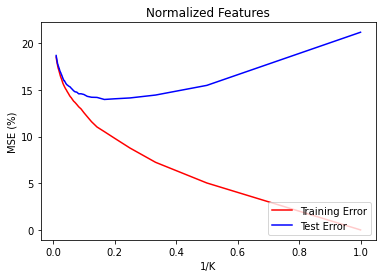

In [300]:
# Normalized features

# MinMaxScaler normalizes features (0,1)
scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_minmax, y, test_size=0.30, random_state = 0) #random_state for reproducibility

# empty lists for plotting
train_error_list = []
test_error_list = []
k_values = []

# Variables for determining k*
optimal_k = 0
min_test_error = 100

for k in range(1, 101): # ends at 100
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_norm, y_train_norm)
    y_train_pred = knn.predict(x_train_norm)
    y_test_pred = knn.predict(x_test_norm)
    train_error = metrics.mean_squared_error(y_train_norm, y_train_pred)
    test_error = metrics.mean_squared_error(y_test_norm, y_test_pred)
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    k_reciprocal = 1/k 
    k_values.append(k_reciprocal)
    if test_error < min_test_error:
        optimal_k = k
        min_test_error = test_error


print("K* =", optimal_k)
print("Test MSE =", min_test_error)
plt.title('Normalized Features')
plt.plot(k_values, train_error_list, color = 'red', label = 'Training Error')
plt.plot(k_values, test_error_list, color = 'blue', label = 'Test Error')
plt.legend(loc='lower right')
plt.xlabel('1/K')
plt.ylabel('MSE (%)')
    

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [301]:
data = {'Model':['Linear Regression','Linear Regression','Linear Regression','KNN Regression (K=5)','KNN Regression (K=6)'],
        'Features':['Initial Features','All features','Significant Features','Initial Features','Normalized Features'], 
        'Test MSE (%)':[20.368383002885913, 17.52016099755027, 17.565669596610512, 15.6635051689307, 13.969460847943033]}
table = pd.DataFrame(data)
table

,Model,Features,Test MSE (%)
0,Linear Regression,Initial Features,20.368383
1,Linear Regression,All features,17.520161
2,Linear Regression,Significant Features,17.565670
3,KNN Regression (K=5),Initial Features,15.663505
4,KNN Regression (K=6),Normalized Features,13.969461


The linear regression model with the smallest test MSE was the model with all features, including interaction terms and quadratic nonlinearities. Both of the KNN regression models had a lower test MSE, which suggests that at the optimal k value, k nearest neighbors regression performs better than the linear regression model for this data. This is especially interesting because it required less feature manipulation to set up our k-nearest neighbors model than our linear regression model. It is also worth noting that our normalized features model performed the best, which suggests that feature normalization might be a good way to reduce test error in the future.